In [2]:
import sqlite3

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [3]:
conn = sqlite3.connect("../db.sqlite3")

query = """
    SELECT datetime, quantity, order_id, product_id, price, name
    FROM restaurant_order
    JOIN restaurant_orderitem 
    ON restaurant_order.id = restaurant_orderitem.order_id
    JOIN restaurant_product 
    ON restaurant_orderitem.product_id = restaurant_product.id
"""

df = pd.read_sql_query(query, conn)
conn.close()

df.to_csv("data.csv", index=False)

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

<Axes: title={'center': 'Top 10 popular products'}, ylabel='quantity'>

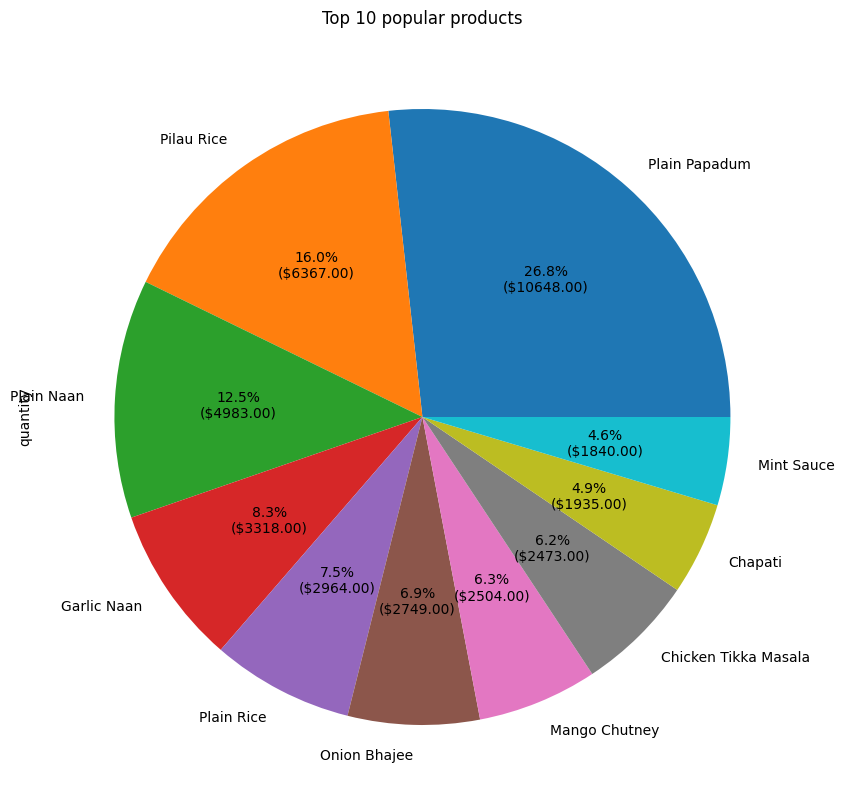

In [4]:
df = pd.read_csv("data.csv")

product_counts = df.groupby("name")["quantity"].sum().sort_values(ascending=False).head(10)

def func(percentage):
    total = sum(product_counts)
    price = percentage * total / 100
    return f"{percentage:.1f}%\n(${price:.2f})"

plt.title("Top 10 popular products")
product_counts.plot.pie(autopct=func, figsize=(10, 10))


# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

<Axes: title={'center': 'Top 10 products by item price'}, ylabel='item price'>

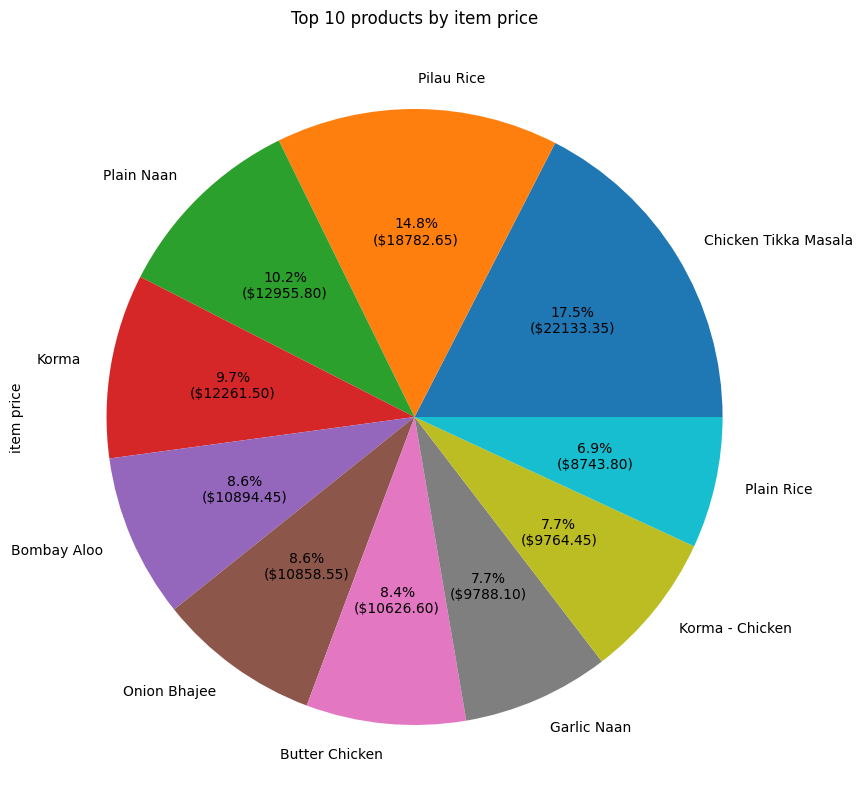

In [5]:
df["item price"] = df["quantity"] * df["price"]

product_item_price = df.groupby("name")["item price"].sum().sort_values(ascending=False).head(10)

def func(percentage):
    total = sum(product_item_price)
    price = percentage * total / 100
    return f"{percentage:.1f}%\n(${price:.2f})"

plt.title("Top 10 products by item price")
product_item_price.plot.pie(autopct=func, figsize=(10, 10))

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

<Axes: title={'center': 'Profit by order hour'}, xlabel='order hour'>

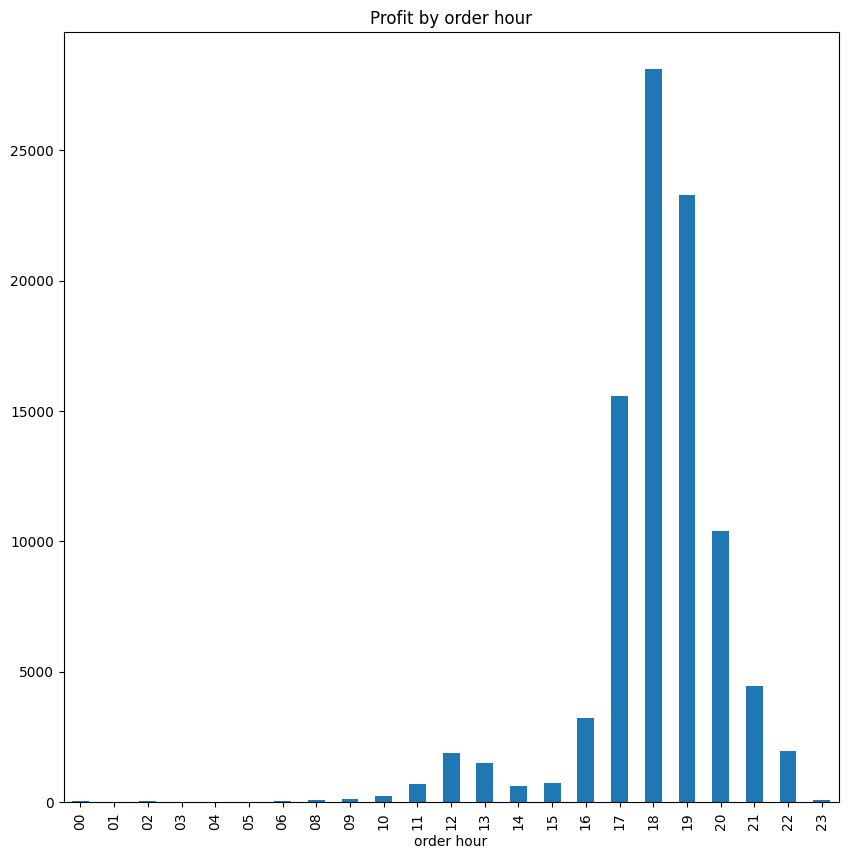

In [24]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["order hour"] = df["datetime"].dt.strftime("%H")

product_order_hour = df.groupby("order hour")["quantity"].sum()

plt.title("Profit by order hour")
product_order_hour.plot.bar(figsize=(10, 10))


# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

<Axes: title={'center': 'Order Day Of The Week'}, xlabel='order day of the week'>

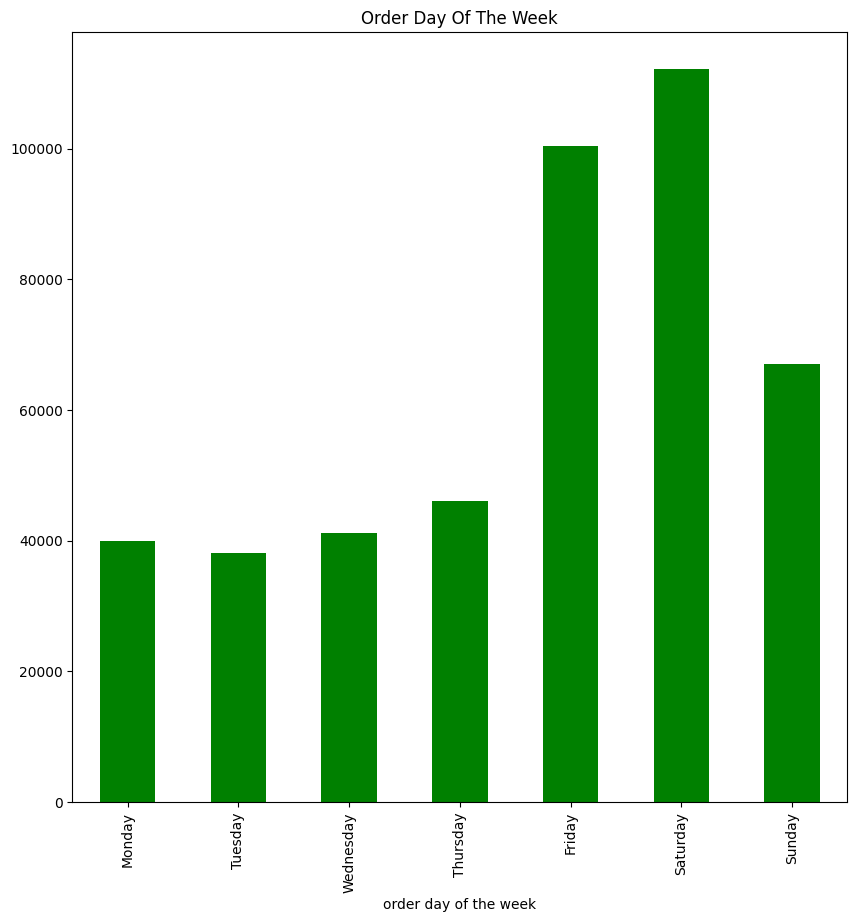

In [36]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["order day of the week"] = df["datetime"].dt.strftime("%A")

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
order_day_of_the_week = df.groupby("order day of the week")["item price"].sum().reindex(day_order)

plt.title("Order Day Of The Week")
order_day_of_the_week.plot.bar(figsize=(10, 10), color=["green"])